### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [6]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Load the dataset

In [7]:
df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [8]:
df.shape

(506, 13)

**Get the info regarding column datatypes**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Get summary statistics for the numerical columns**

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**For the column `CHAS`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [13]:
df["CHAS"] = df["CHAS"].replace({1: "yes", 0: "no"})
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,no,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,no,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [14]:
# splitting the data into the dependent and independent variables
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [15]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,0


In [16]:
# this adds the constant term to the dataset
X = sm.add_constant(X)

In [17]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [18]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.38e-83
Time:                        09:57:31   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [19]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [20]:
checking_vif(X_train)

,feature,VIF
0,const,535.372593
1,CRIM,1.924114
2,ZN,2.743574
3,INDUS,3.999538
4,NX,4.396157
5,RM,1.860950
6,AGE,3.150170
7,DIS,4.355469
8,RAD,8.345247
9,TAX,10.191941


### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [21]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [22]:
col_list = ["RAD", "TAX"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,TAX,0.693267,4.997394
1,RAD,0.687451,5.044546


In [23]:
col_to_drop = "TAX"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  TAX


,feature,VIF
0,const,532.025529
1,CRIM,1.923159
2,ZN,2.483399
3,INDUS,3.270983
4,NX,4.361847
5,RM,1.857918
6,AGE,3.149005
7,DIS,4.333734
8,RAD,2.942862
9,PTRATIO,1.909750


- None of the variables show moderate or high multicollinearity.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [24]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'CRIM', 'ZN', 'NX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT', 'CHAS_yes']


In [25]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [26]:
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     90.34
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           4.34e-85
Time:                        09:57:55   Log-Likelihood:                -1065.8
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     344   BIC:                             2190.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8196      6.092      8.014      0.0

**Observations**

- Dropping the high p-value predictor variables has not adversely affected the model performance.
- This shows that these variables do not significantly impact the target variable.

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [27]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
13,20.4,19.428323,0.971677
61,16.0,17.881985,-1.881985
377,13.3,18.672515,-5.372515
39,30.8,31.377965,-0.577965
365,27.5,16.946181,10.553819


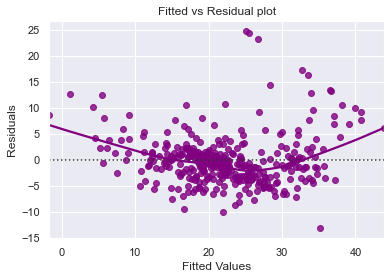

In [28]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

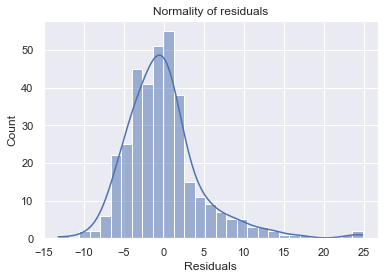

In [29]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals almost has a bell shape structure.
- Let's check the Q-Q plot.

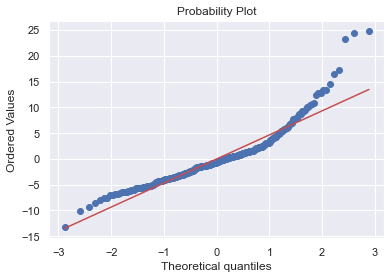

In [30]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

- The residuals almost follow a straight line.
- Let's check the results of the Shapiro-Wilk test.

In [31]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.8942403793334961, pvalue=5.9160474099890364e-15)

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- However, based on the distribution plot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [32]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.22245990682205), ('p-value', 0.09768630044182945)]

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

**All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.**

## Final Model Summary

In [33]:
olsmodel_final = sm.OLS(y_train, X_train3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     90.34
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           4.34e-85
Time:                        09:58:18   Log-Likelihood:                -1065.8
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     344   BIC:                             2190.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8196      6.092      8.014      0.0

### Inferences from the model

- A unit increase in per capita crime rate (`CRIM`) decreases the median house price by 0.1110 units, all other variables held constant.
- A unit increase in nitric oxides concentration (`NX`) decreases the median house price by 23.4485 units, all other variables held constant.
- A unit increase in average number of rooms (`RM`) increases the median house price by 2.7844 units, all other variables held constant.
- A unit increase in index of accessibility to radial highways (`RAD`) increases the median house price by 0.1353 units, all other variables held constant.
- Houses where tract bounds river (`CHAS_yes`) will have a 2.8779 units higher median price that the ones where tract does not bound river (`CHAS_no`).